In [3]:
import sys
import pandas as pd 
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import IPython
import sklearn 
import xgboost as xgb

In [32]:
from sklearn.model_selection import train_test_split
X = pd.read_csv("../data/preprocessed/trainig_data.csv")
y = pd.read_csv("../data/preprocessed/target_data.csv")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [41]:
y_train = y_train["yield_kg_per_hectare"]
y_test  = y_test["yield_kg_per_hectare"]

In [42]:
from xgboost import XGBRegressor
import xgboost as xgb

xgb_params = dict(
    n_estimators=2000,
    learning_rate=0.03,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1,
)

xgb_params.update(dict(device="cuda"))         

model = XGBRegressor(**xgb_params)

from xgboost.callback import EarlyStopping
early_stop = EarlyStopping(rounds=50, save_best=True)

model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],   
    verbose=False
)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device='cuda', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.03, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=2000,
             n_jobs=-1, num_parallel_tree=None, ...)

In [43]:
y_pred = model.predict(X_test)

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)

print(f"MAE : {mae:.2f} кг/га")
print(f"RMSE: {rmse:.2f} кг/га")
print(f"R²  : {r2:.3f}")


MAE : 1112.47 кг/га
RMSE: 1271.47 кг/га
R²  : -0.171


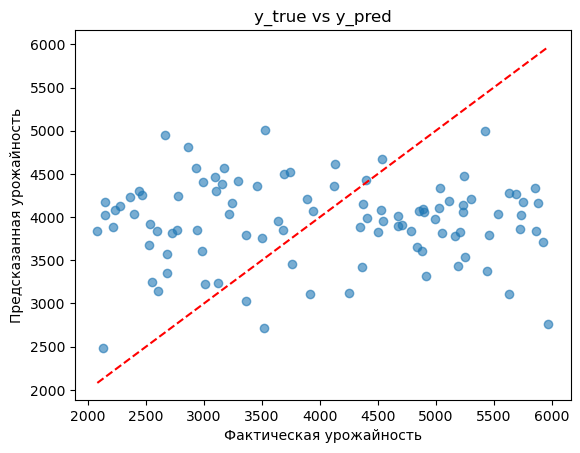

In [45]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Фактическая урожайность")
plt.ylabel("Предсказанная урожайность")
plt.title("y_true vs y_pred")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")  # линия идеала
plt.show()


In [ ]:
import numpy as np
import pandas as pd

print("y_pred shape:", np.asarray(y_pred).shape)
print("y_test shape:", np.asarray(y_test).shape)

y_pred_1d = np.asarray(y_pred).ravel()     
y_test_1d = np.asarray(getattr(y_test, "values", y_test)).ravel()

results = pd.DataFrame({
    "Факт": y_test_1d,
    "Прогноз": y_pred_1d
})

results["Ошибка"] = results["Факт"] - results["Прогноз"]
results["Абс_ошибка"] = results["Ошибка"].abs()

print(results.head(10))


y_pred shape: (100,)
y_test shape: (100,)
      Факт      Прогноз       Ошибка   Абс_ошибка
0  5867.22  3840.427246  2026.792754  2026.792754
1  5252.74  3536.494873  1716.245127  1716.245127
2  5192.59  3438.722656  1753.867344  1753.867344
3  2980.51  3609.016113  -628.506113   628.506113
4  5235.26  4141.817383  1093.442617  1093.442617
5  5114.20  4191.590820   922.609180   922.609180
6  2994.61  4409.803711 -1415.193711  1415.193711
7  3362.37  3798.624756  -436.254756   436.254756
8  2775.61  4245.928711 -1470.318711  1470.318711
9  3498.61  3763.609619  -264.999619   264.999619


In [47]:
y_test.head()

0    5867.22
1    5252.74
2    5192.59
3    2980.51
4    5235.26
Name: yield_kg_per_hectare, dtype: float64

In [49]:
X_train.head()

,Unnamed: 0,soil_moisture_%,soil_pH,pesticide_usage_ml,latitude,longitude,region_le,croptype_le,cropdisease_le,irrigation_type_le,fertilizer_type_le,sowing_month,sowing_season
0,249,26.46,5.88,39.71,21.520866,85.419919,2,3,0,3,0,2,1
1,433,38.82,7.20,13.25,15.992381,87.410792,4,3,1,2,1,3,2
2,19,16.99,7.34,19.77,19.991960,89.622994,4,2,2,3,0,1,1
3,322,25.20,5.94,6.80,23.278043,79.585387,3,1,2,2,2,2,1
4,332,41.36,7.44,36.01,12.921902,70.495912,0,0,0,2,0,3,2


In [50]:
bias = (y_pred - y_test).mean()
print("Средний сдвиг прогноза:", bias)


Средний сдвиг прогноза: -63.394741601562515


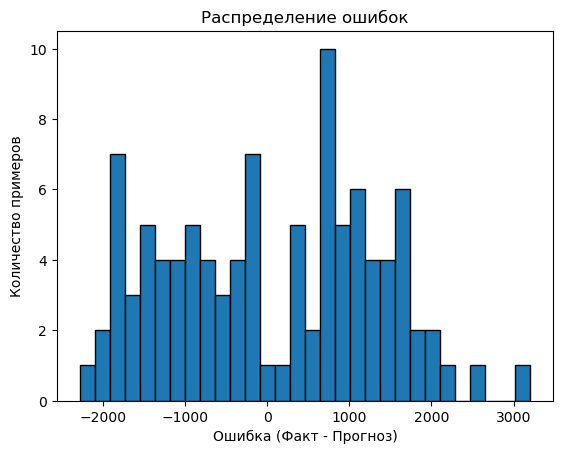

In [51]:
import matplotlib.pyplot as plt

plt.hist(y_test - y_pred, bins=30, edgecolor="black")
plt.title("Распределение ошибок")
plt.xlabel("Ошибка (Факт - Прогноз)")
plt.ylabel("Количество примеров")
plt.show()


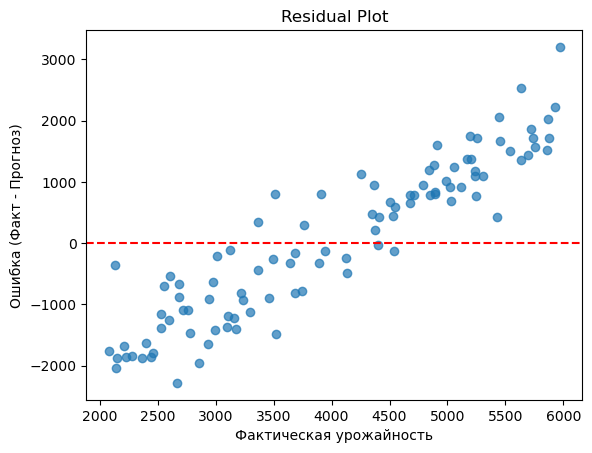

In [52]:
plt.scatter(y_test, y_test - y_pred, alpha=0.7)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Фактическая урожайность")
plt.ylabel("Ошибка (Факт - Прогноз)")
plt.title("Residual Plot")
plt.show()
